In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('popular_10000_movies_tmdb.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['id', 'title', 'release_date', 'genres', 'original_language',
       'vote_average', 'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime', 'tagline'],
      dtype='object')

In [5]:
df[['id', 'overview', 'tagline']].head(2)

,id,overview,tagline
0,758323,"Father Gabriele Amorth, Chief Exorcist of the ...",Inspired by the actual files of Father Gabriel...
1,640146,Super-Hero partners Scott Lang and Hope van Dy...,Witness the beginning of a new dynasty.


In [6]:
df.drop(['id', 'overview', 'tagline'], axis=1, inplace=True)

In [7]:
df.shape

(10000, 11)

In [8]:
df.isnull().sum()

title                    0
release_date            21
genres                   0
original_language        0
vote_average             0
vote_count               0
popularity               0
budget                   0
production_companies     0
revenue                  0
runtime                  0
dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df.shape

(9979, 11)

In [11]:
df['original_language'].unique()

array(['English', 'French', 'Dutch', 'Spanish', 'Korean', 'Japanese',
       'Finnish', 'Ukrainian', 'Norwegian', 'Estonian', 'cn', 'Polish',
       'Russian', 'German', 'Chinese', 'Italian', 'Basque', 'Thai',
       'Turkish', 'Swedish', 'Icelandic', 'Tagalog', 'Bengali', 'Arabic',
       'Tamil', 'Telugu', 'Romanian', 'Indonesian', 'Galician', 'Danish',
       'Macedonian', 'Portuguese', 'Vietnamese', 'Catalan', 'Hindi',
       'Persian', 'Hebrew', 'Serbian', 'Malayalam', 'Greek', 'Hungarian',
       'Czech', 'Norwegian Bokmal', 'xx', 'Kannada', 'Irish', 'Khmer',
       'sh', 'Dzongkha', 'Panjabi', 'Sundanese'], dtype=object)

In [12]:
df[df['original_language'].isin(['xx', 'sh'])]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
6340,Barbie,1977-01-01,[],xx,2.0,1,9.890,0,[],0,10
7837,Vertigo,2016-08-10,['Drama'],xx,2.0,1,10.093,200,[],0,6
9096,I Miss Sonia Henie,1971-01-20,"['Comedy', 'Drama']",sh,5.5,15,13.323,0,['Neoplanta Film'],0,16


In [13]:
df = df[~(df['original_language'].isin(['xx', 'sh']))]

In [14]:
df.shape

(9976, 11)

In [15]:
df.duplicated().sum()

0

In [16]:
df.select_dtypes(include='object').dtypes

title                   object
release_date            object
genres                  object
original_language       object
production_companies    object
dtype: object

In [17]:
df.select_dtypes(exclude='object').dtypes

vote_average    float64
vote_count        int64
popularity      float64
budget            int64
revenue           int64
runtime           int64
dtype: object

### Title 

In [18]:
df['title'].nunique()

9629

In [19]:
df['title'].duplicated().sum()

347

In [20]:
df[df['title'].isin(df['title'][df['title'].duplicated()])].shape

(661, 11)

In [21]:
df[df['title'].isin(df['title'][df['title'].duplicated()])].head(2)

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
30,Attack on Titan,2022-09-30,"['Action', 'Science Fiction']",English,6.0,125,525.410,0,"['The Asylum', 'Emerald City Films']",0,93
40,The Exorcist,2022-11-02,['Horror'],Spanish,5.8,76,390.589,0,['BTF media'],0,101


In [22]:
df[df['genres'].str.len() == 2].shape

(61, 11)

In [23]:
df[df['genres'].str.len() == 2].head(2)

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
610,Snake Beauty,1994-03-26,[],Chinese,0.0,0,61.292,0,['Ka Shing Film Production Co.'],0,88
684,Za gyakutai: Nyotai ikedori-hen,1987-07-18,[],Japanese,6.5,1,62.096,0,['Orient 21'],0,64


In [24]:
df = df[~(df['genres'].str.len() == 2)]

In [25]:
df.shape

(9915, 11)

### Production Companies

In [26]:
df[df['production_companies'].str.len() == 2].shape

(519, 11)

In [27]:
df[df['production_companies'].str.len() == 2].head(2)

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
21,Adrenaline,2022-12-15,['Action'],English,5.9,39,717.878,0,[],0,75
27,The Elderly,2023-04-21,"['Horror', 'Thriller', 'Fantasy']",Spanish,5.8,6,521.201,0,[],0,95


In [28]:
df = df[~(df['production_companies'].str.len() == 2)]

In [29]:
df.shape

(9396, 11)

## Zero Values 

In [30]:
(df == 0).sum()

title                      0
release_date               0
genres                     0
original_language          0
vote_average             130
vote_count               129
popularity                 0
budget                  4286
production_companies       0
revenue                 3986
runtime                  106
dtype: int64

### Vote Average, Vote Count and Runtime 

In [31]:
df[(df['vote_average'] == 0) | (df['vote_count'] == 0) | (df['runtime'] == 0)].shape

(173, 11)

In [32]:
df[(df['vote_average'] == 0) | (df['vote_count'] == 0) | (df['runtime'] == 0)].head(2)

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
23,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,0.0,0,732.647,340000000,"['Universal Pictures', 'Original Film', 'One R...",0,142
100,"Kiss, Kiss!",2023-04-26,"['Romance', 'Comedy']",Polish,6.9,15,361.900,0,['Lightcraft'],0,0


In [33]:
df = df[~((df['vote_average'] == 0) | (df['vote_count'] == 0) | (df['runtime'] == 0))]

In [34]:
df.shape

(9223, 11)

## Descriptive Statistics

In [35]:
df.describe()

,vote_average,vote_count,popularity,budget,revenue,runtime
count,9223.000000,9223.000000,9223.000000,9.223000e+03,9.223000e+03,9223.000000
mean,6.542546,1652.788247,31.635078,2.081719e+07,6.479669e+07,103.287867
std,0.907423,2952.562540,114.867339,3.935068e+07,1.596469e+08,24.410714
min,1.000000,1.000000,7.411000,0.000000e+00,0.000000e+00,2.000000
25%,6.000000,170.000000,13.591000,0.000000e+00,0.000000e+00,91.000000
50%,6.600000,580.000000,17.619000,2.500000e+06,3.769990e+06,101.000000
75%,7.200000,1726.000000,27.182500,2.500000e+07,5.806524e+07,115.000000
max,10.000000,33633.000000,5089.969000,5.793304e+08,2.923706e+09,449.000000


### Profit 

In [36]:
df['profit'] = df['revenue'] - df['budget']

In [37]:
df.shape

(9223, 12)

## Save the dataset 

In [38]:
df.to_csv('movies.csv', index=False)

## Top 10 movies for every category 

In [39]:
df.select_dtypes(exclude='object').dtypes

vote_average    float64
vote_count        int64
popularity      float64
budget            int64
revenue           int64
runtime           int64
profit            int64
dtype: object

In [40]:
max_va = df.sort_values('vote_average', ascending=False).head(10)
#max_va['vote_average'].to_list()
max_vc = df.sort_values('vote_count', ascending=False).head(10)
#max_vc['vote_count'].to_list()
max_popularity = df.sort_values('popularity', ascending=False).head(10)
#max_popularity['popularity'].to_list()
max_budget = df.sort_values('budget', ascending=False).head(10)
#max_budget['budget'].to_list()
max_revenue = df.sort_values('revenue', ascending=False).head(10)
#max_revenue['revenue'].to_list()
max_profit = df.sort_values('profit', ascending=False).head(10)
#max_profit['profit'].to_list()
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss.rename(columns={'profit' : 'loss'}, inplace=True)
#max_loss['loss'].to_list()

## Visualization 

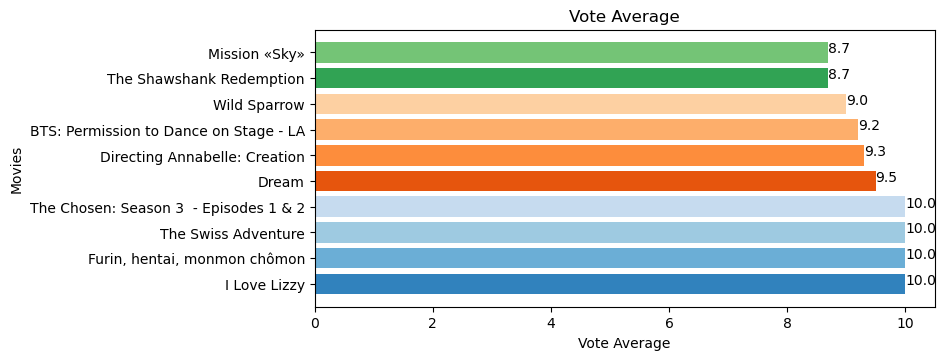

In [41]:
plt.figure(figsize=(8,3.6))
plt.title('Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Movies')
plt.barh(max_va['title'], max_va['vote_average'], color=plt.get_cmap('tab20c').colors)
for i in range(len(max_va)):
    plt.text(max_va['vote_average'].iloc[i], max_va['title'].iloc[i], max_va['vote_average'].iloc[i])

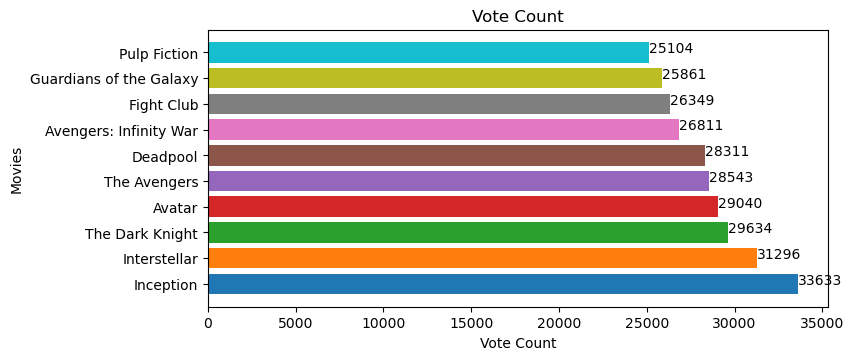

In [42]:
plt.figure(figsize=(8,3.6))
plt.title('Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movies')
plt.barh(max_vc['title'], max_vc['vote_count'], color=plt.get_cmap('tab10').colors)
for i in range(len(max_vc)):
    plt.text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

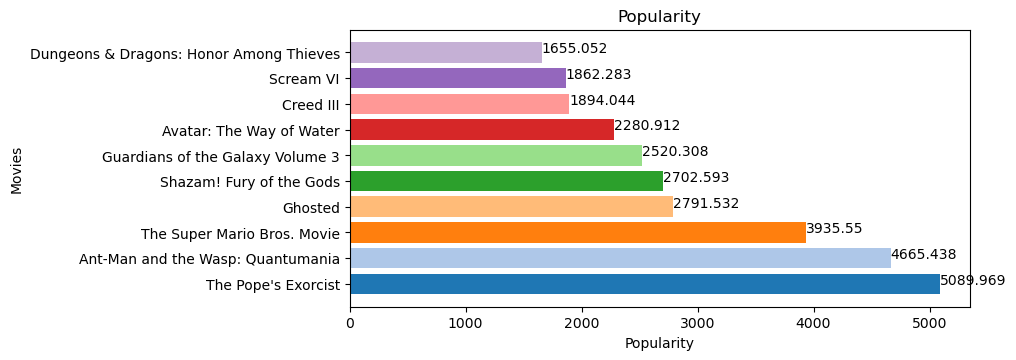

In [43]:
plt.figure(figsize=(8,3.6))
plt.title('Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movies')
plt.barh(max_popularity['title'], max_popularity['popularity'], color=plt.get_cmap('tab20').colors)
for i in range(len(max_popularity)):
    plt.text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

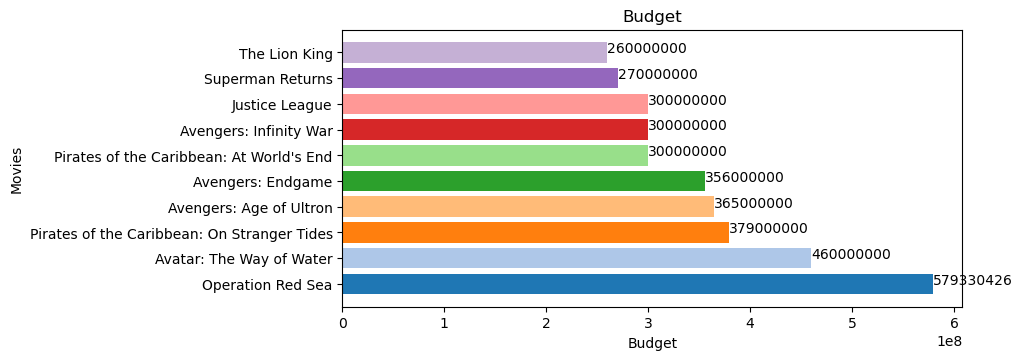

In [44]:
plt.figure(figsize=(8,3.6))
plt.title('Budget')
plt.xlabel('Budget')
plt.ylabel('Movies')
plt.barh(max_budget['title'], max_budget['budget'], color=plt.get_cmap('tab20').colors)
for i in range(len(max_budget)):
    plt.text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

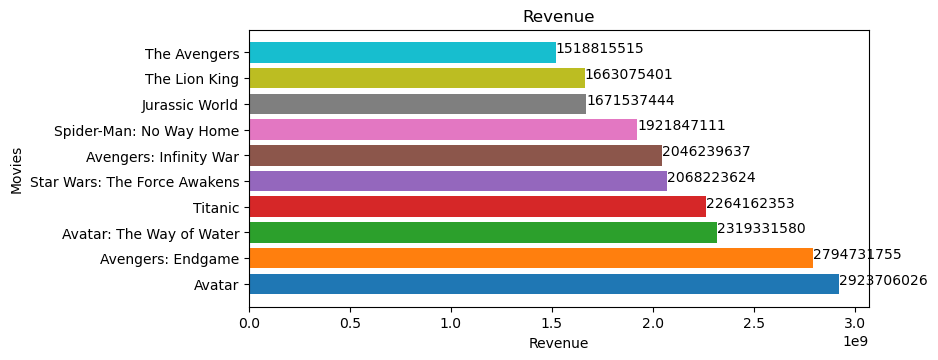

In [45]:
plt.figure(figsize=(8,3.6))
plt.title('Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movies')
plt.barh(max_revenue['title'], max_revenue['revenue'], color=plt.get_cmap('tab10').colors)
for i in range(len(max_revenue)):
    plt.text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

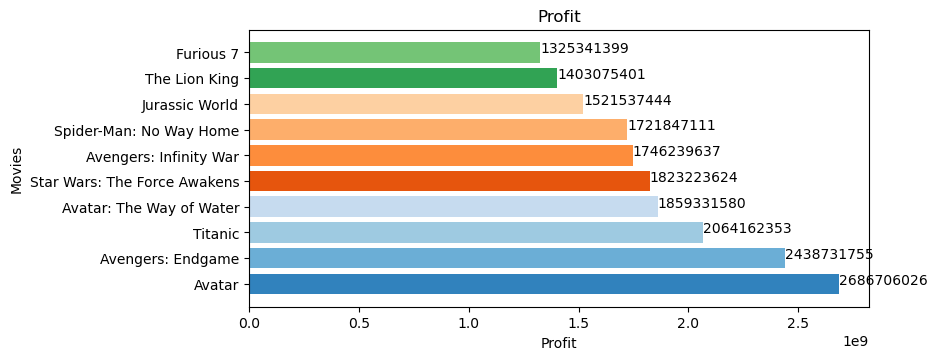

In [46]:
plt.figure(figsize=(8,3.6))
plt.title('Profit')
plt.xlabel('Profit')
plt.ylabel('Movies')
plt.barh(max_profit['title'], max_profit['profit'], color=plt.get_cmap('tab20c').colors)
for i in range(len(max_profit)):
    plt.text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])

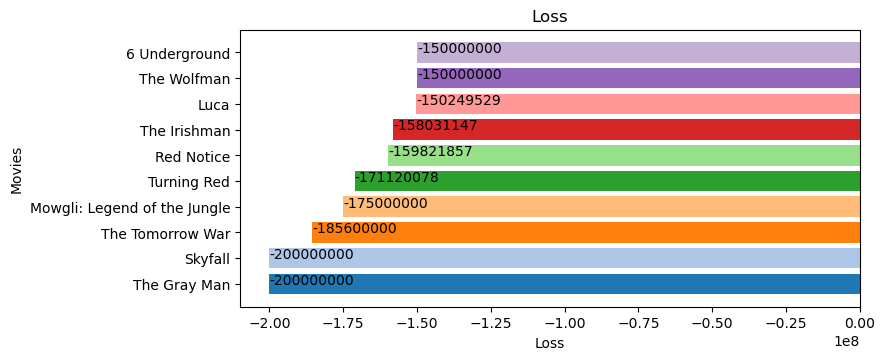

In [47]:
plt.figure(figsize=(8,3.6))
plt.title('Loss')
plt.xlabel('Loss')
plt.ylabel('Movies')
plt.barh(max_loss['title'], max_loss['loss'], color=plt.get_cmap('tab20').colors)
for i in range(len(max_loss)):
    plt.text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

In [48]:
max_loss['loss'] = -max_loss['loss']

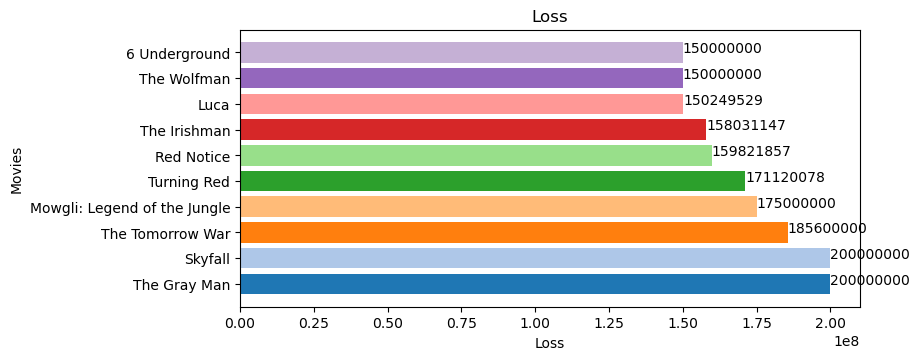

In [49]:
plt.figure(figsize=(8,3.6))
plt.title('Loss')
plt.xlabel('Loss')
plt.ylabel('Movies')
plt.barh(max_loss['title'], max_loss['loss'], color=plt.get_cmap('tab20').colors)
for i in range(len(max_loss)):
    plt.text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

### Count of Movies Language 

In [50]:
df['original_language'].value_counts()

English             6962
Japanese             648
Spanish              289
French               283
Korean               182
Italian              143
cn                   119
Chinese              108
German                78
Russian               65
Tagalog               35
Hindi                 33
Norwegian             31
Danish                30
Polish                26
Portuguese            24
Thai                  23
Swedish               23
Dutch                 22
Indonesian            16
Turkish               14
Tamil                  8
Telugu                 7
Finnish                6
Greek                  4
Romanian               4
Ukrainian              4
Arabic                 3
Basque                 3
Hungarian              3
Persian                3
Galician               2
Khmer                  2
Kannada                2
Czech                  2
Malayalam              2
Serbian                2
Hebrew                 2
Catalan                2
Icelandic              2


### Unique Genres 

In [51]:
genres_set = set()

for genres_list in df['genres']:
    genres = eval(genres_list)
    genres_set.update(genres)

len(genres_set)

19

## 5 Most Popular Movies 

In [52]:
for genre in genres_set:
    print(genre)
    for i, title in enumerate(df[df['genres'].str.contains(genre)].sort_values('popularity', ascending=False).head()['title']):
        print(i+1, title)
    print('\n')

Music
1 Encanto at the Hollywood Bowl
2 Guillermo del Toro's Pinocchio
3 Lyle, Lyle, Crocodile
4 Blue's Big City Adventure
5 Coco


Fantasy
1 The Super Mario Bros. Movie
2 Shazam! Fury of the Gods
3 Dungeons & Dragons: Honor Among Thieves
4 Peter Pan & Wendy
5 Puss in Boots: The Last Wish


Thriller
1 The Pope's Exorcist
2 Scream VI
3 AKA
4 John Wick: Chapter 4
5 Cocaine Bear


Romance
1 Ghosted
2 Shotgun Wedding
3 The Quintessential Quintuplets Movie
4 Unhappily Ever After
5 The Forbidden Legend: Sex & Chopsticks 2


Mystery
1 The Pope's Exorcist
2 Scream VI
3 Clock
4 Invitation to a Murder
5 Batman: The Doom That Came to Gotham


Animation
1 The Super Mario Bros. Movie
2 Puss in Boots: The Last Wish
3 Justice League x RWBY: Super Heroes & Huntsmen, Part One
4 Mummies
5 That Time I Got Reincarnated as a Slime the Movie: Scarlet Bond


Drama
1 Creed III
2 The Last Kingdom: Seven Kings Must Die
3 Puss in Boots: The Last Wish
4 The Park
5 Marcel the Shell with Shoes On


Action
1 Ant-Man

## 5 Most Profitable Movies 

In [53]:
for genre in genres_set:
    print(genre)
    for i, title in enumerate(df[df['genres'].str.contains(genre)].sort_values('profit', ascending=False).head()['title']):
        print(i+1, title)
    print('\n')

Music
1 Bohemian Rhapsody
2 Coco
3 Sing
4 La La Land
5 A Star Is Born


Fantasy
1 Avatar
2 Star Wars: The Force Awakens
3 Frozen II
4 Harry Potter and the Deathly Hallows: Part 2
5 Frozen


Thriller
1 Jurassic World
2 Furious 7
3 Jurassic World: Fallen Kingdom
4 Joker
5 The Fate of the Furious


Romance
1 Titanic
2 Beauty and the Beast
3 Aladdin
4 Shrek 2
5 The Twilight Saga: Breaking Dawn - Part 2


Mystery
1 Harry Potter and the Order of the Phoenix
2 Full River Red
3 The Da Vinci Code
4 The Sixth Sense
5 The Batman


Animation
1 The Lion King
2 Frozen II
3 Frozen
4 Minions
5 Incredibles 2


Drama
1 Titanic
2 The Lion King
3 Top Gun: Maverick
4 Joker
5 Bohemian Rhapsody


Action
1 Avatar
2 Avengers: Endgame
3 Avatar: The Way of Water
4 Star Wars: The Force Awakens
5 Avengers: Infinity War


Family
1 The Lion King
2 Frozen II
3 Frozen
4 Beauty and the Beast
5 Minions


War
1 Wolf Warrior 2
2 Dunkirk
3 American Sniper
4 The Battle at Lake Changjin: Water Gate Bridge
5 Saving Private Ry

## Top 5 Production Companies with Maximum Movie Count 

In [54]:
company_counts = {}

for companies_list in df['production_companies']:
    for company in eval(companies_list):
        if company in company_counts:
            company_counts[company] += 1
        else:
            company_counts[company] = 1

sorted_companies = sorted(company_counts.items(), key=lambda x: x[1], reverse=True)
top_5_companies = sorted_companies[:5]

for company, count in top_5_companies:
    print(company, ': ', count)

Warner Bros. Pictures :  488
Universal Pictures :  470
Paramount :  374
Columbia Pictures :  360
20th Century Fox :  348


## Most Popular Movies in every 5 years 

In [55]:
df['release_date'].dtype

dtype('O')

In [56]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [57]:
df['release_date'].dtype

dtype('<M8[ns]')

In [58]:
df['release_hd'] = (df['release_date'].dt.year // 5) * 5

In [59]:
popular_movies = df.groupby('release_hd').apply(lambda x: x.nlargest(1, 'popularity'))

In [60]:
for i, r in popular_movies.iterrows():
    print(f"Year : {r['release_hd']}-{r['release_hd']+4}")
    print('Movie :', r['title'])
    print('Popularity :', r['popularity'])
    print('\n')

Year : 1900-1904
Movie : A Trip to the Moon
Popularity : 14.584


Year : 1920-1924
Movie : Nosferatu
Popularity : 18.37


Year : 1925-1929
Movie : Metropolis
Popularity : 17.496


Year : 1930-1934
Movie : Baby Face
Popularity : 35.37


Year : 1935-1939
Movie : Snow White and the Seven Dwarfs
Popularity : 61.616


Year : 1940-1944
Movie : Bambi
Popularity : 43.576


Year : 1945-1949
Movie : Samson and Delilah
Popularity : 27.865


Year : 1950-1954
Movie : Cinderella
Popularity : 73.639


Year : 1955-1959
Movie : Sleeping Beauty
Popularity : 37.958


Year : 1960-1964
Movie : One Hundred and One Dalmatians
Popularity : 47.549


Year : 1965-1969
Movie : The Jungle Book
Popularity : 52.291


Year : 1970-1974
Movie : The Godfather
Popularity : 113.216


Year : 1975-1979
Movie : Star Wars
Popularity : 90.988


Year : 1980-1984
Movie : Oscenità
Popularity : 129.957


Year : 1985-1989
Movie : The Little Mermaid
Popularity : 104.76


Year : 1990-1994
Movie : Super Mario Bros.
Popularity : 124.39

## Average Popularity by Year 

In [61]:
df['year'] = df['release_date'].dt.year
average_popularity = df.groupby('year')['popularity'].mean()

## Visualization of Categories by Year 

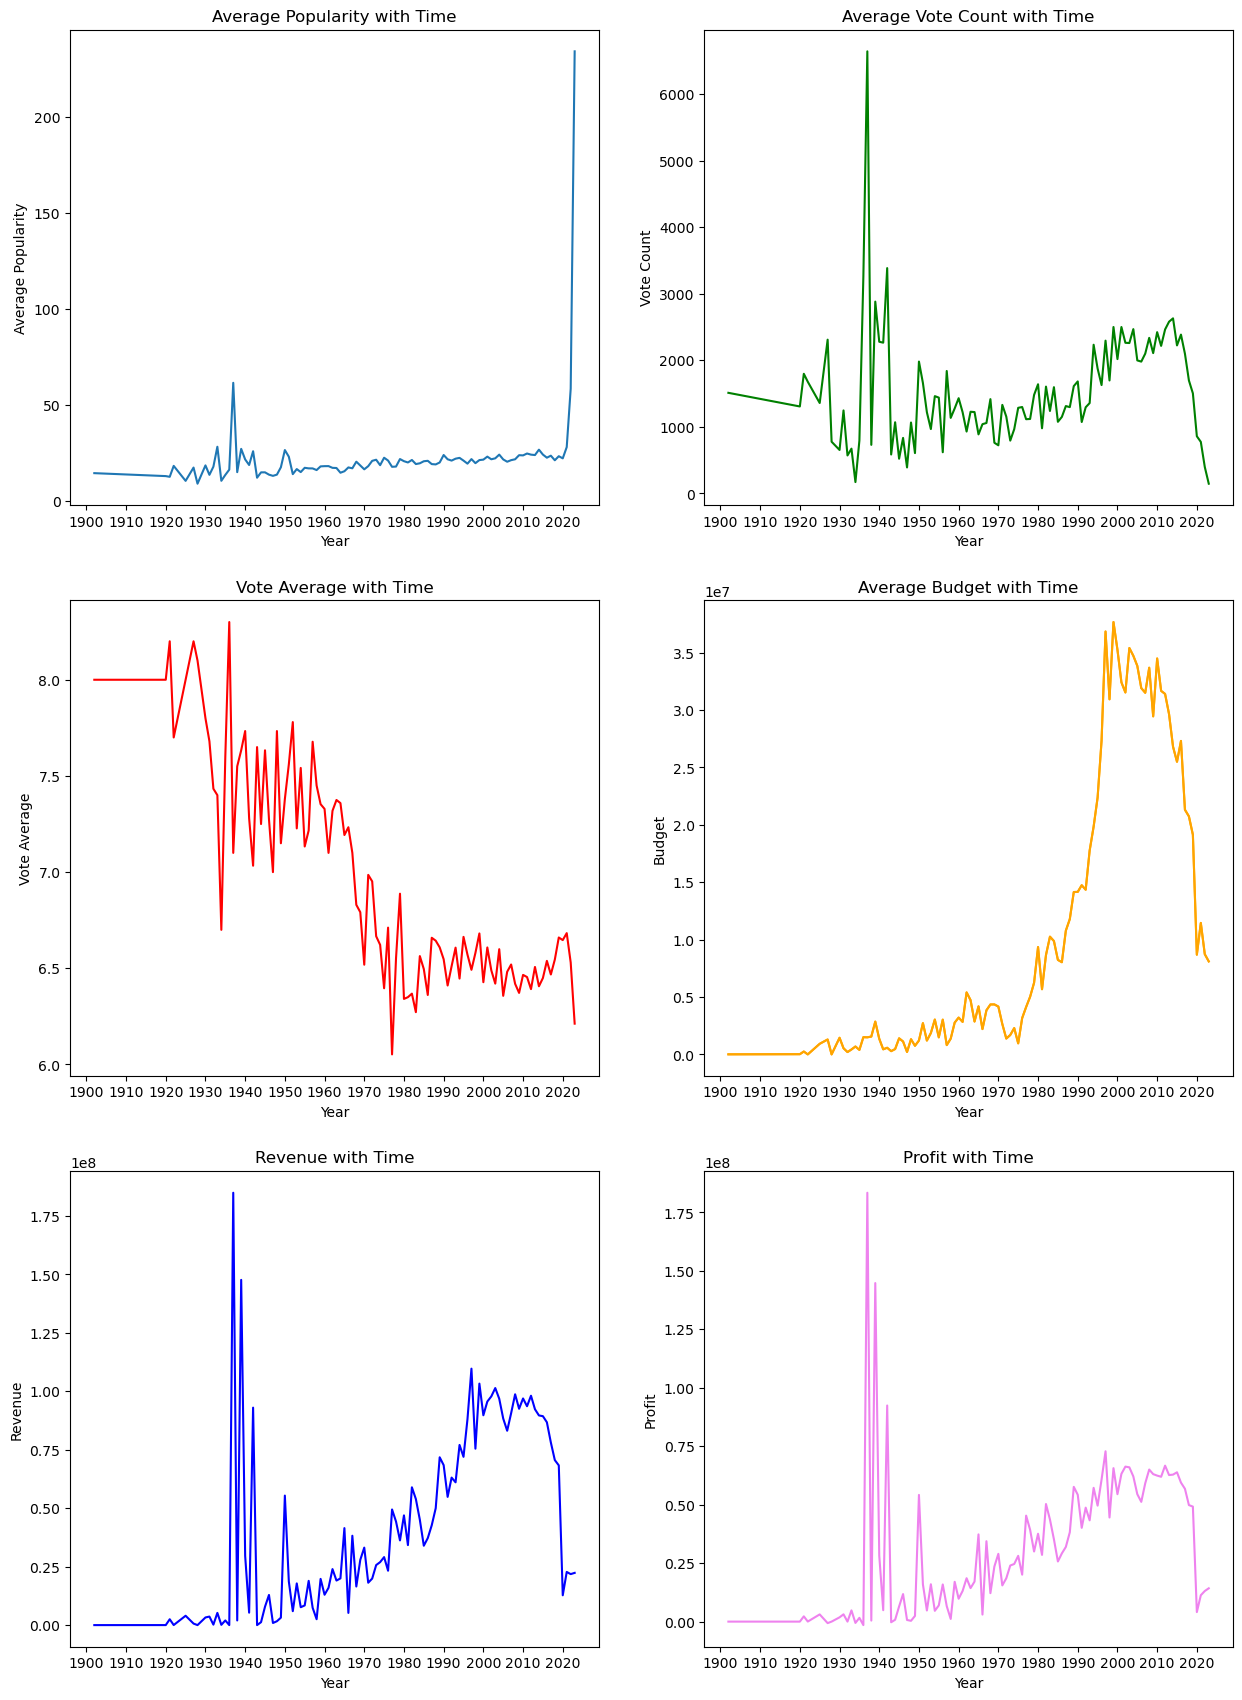

In [62]:
fig, axs = plt.subplots(3,2, figsize=(15,21))

axs[0,0].plot(average_popularity.index, average_popularity.values)
axs[0,0].set_title('Average Popularity with Time')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Average Popularity')
axs[0,0].set_xticks(np.arange(1900, 2030, step=10))

axs[0,1].plot(df.groupby('year')['vote_count'].mean(), color='green')
axs[0,1].set_title('Average Vote Count with Time')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Vote Count')
axs[0,1].set_xticks(np.arange(1900, 2030, step=10))

axs[1,0].plot(df.groupby('year')['vote_average'].mean(), color='red')
axs[1,0].set_title('Vote Average with Time')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Vote Average')
axs[1,0].set_xticks(np.arange(1900, 2030, step=10))

axs[1,1].plot(df.groupby('year')['budget'].mean(), color='orange')
axs[1,1].set_title('Average Budget with Time')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Budget')
axs[1,1].set_xticks(np.arange(1900, 2030, step=10))

axs[1,1].plot(df.groupby('year')['budget'].mean(), color='orange')
axs[1,1].set_title('Average Budget with Time')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Budget')
axs[1,1].set_xticks(np.arange(1900, 2030, step=10))

axs[2,0].plot(df.groupby('year')['revenue'].mean(), color='blue')
axs[2,0].set_title('Revenue with Time')
axs[2,0].set_xlabel('Year')
axs[2,0].set_ylabel('Revenue')
axs[2,0].set_xticks(np.arange(1900, 2030, step=10))

axs[2,1].plot(df.groupby('year')['profit'].mean(), color='violet')
axs[2,1].set_title('Profit with Time')
axs[2,1].set_xlabel('Year')
axs[2,1].set_ylabel('Profit')
axs[2,1].set_xticks(np.arange(1900, 2030, step=10))

plt.show()

### Movie Count with Time 

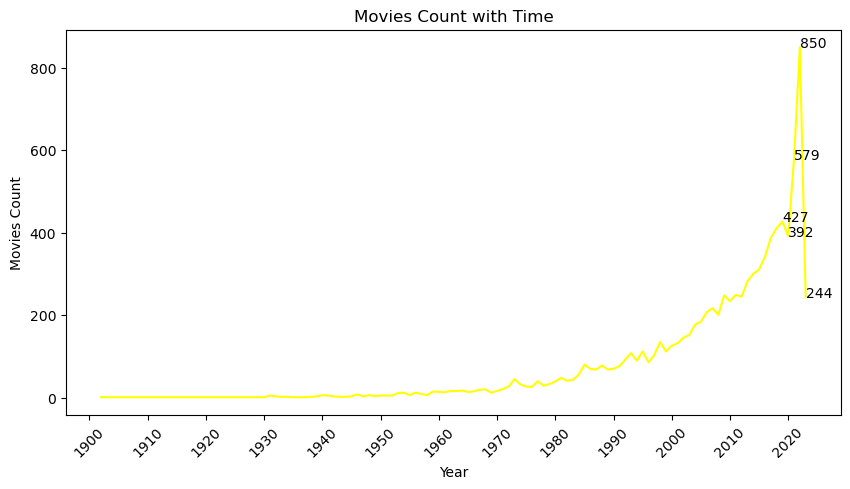

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(df['year'].value_counts().sort_index(), color='Yellow')
plt.title('Movies Count with Time')
plt.xlabel('Year')
plt.ylabel('Movies Count')
plt.xticks(np.arange(1900, 2030, step=10), rotation=45)
for i in range(5):
    ax.text(df['year'].value_counts().sort_index().index[-5+i], df['year'].value_counts().sort_index().values[-5+i],
           df['year'].value_counts().sort_index().values[-5+i])

plt.show()

## Visualization of Rise and Drop of Popularity with Different Genres Over the Time

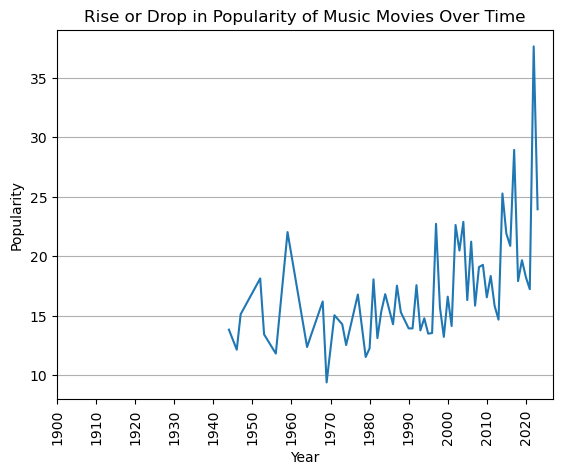

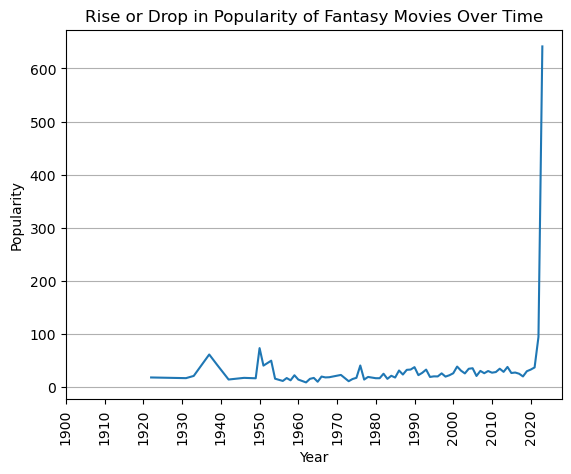

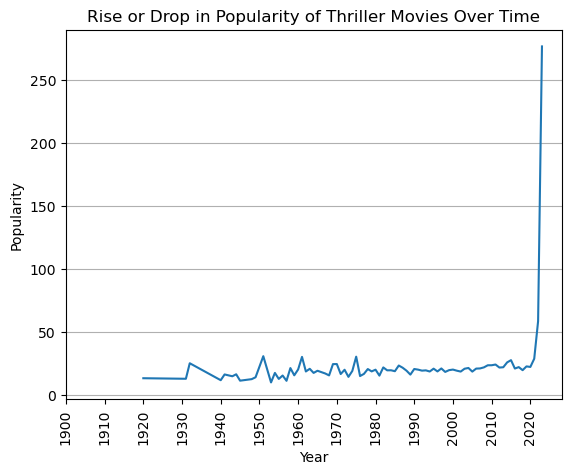

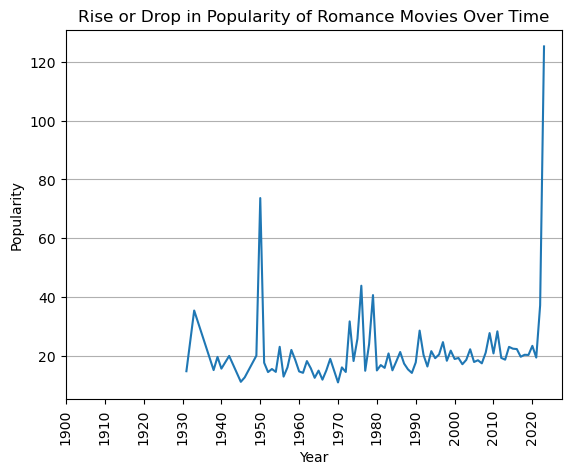

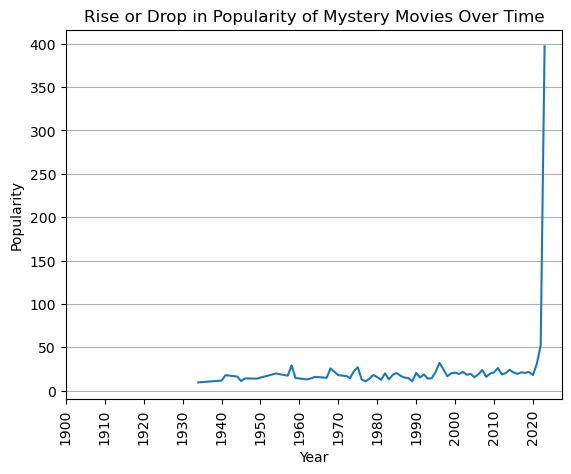

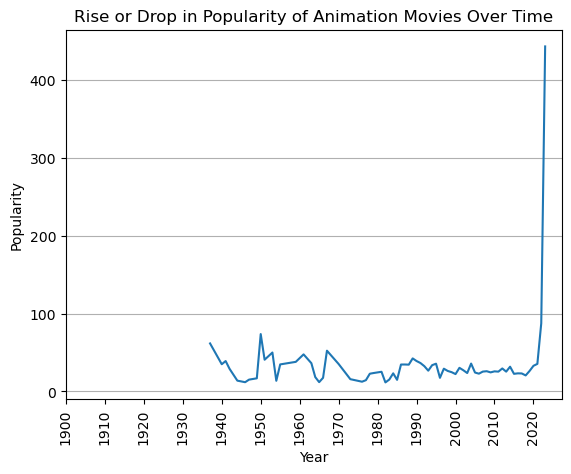

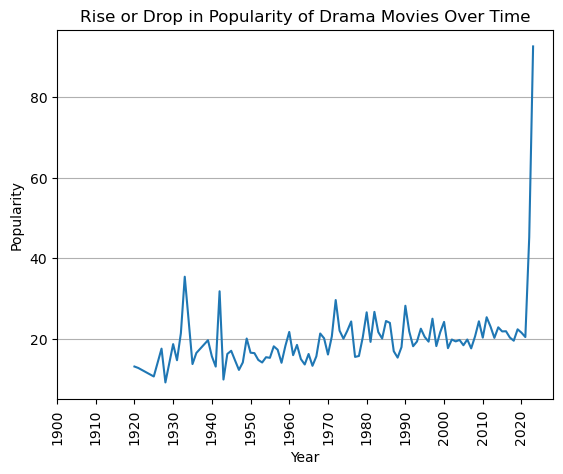

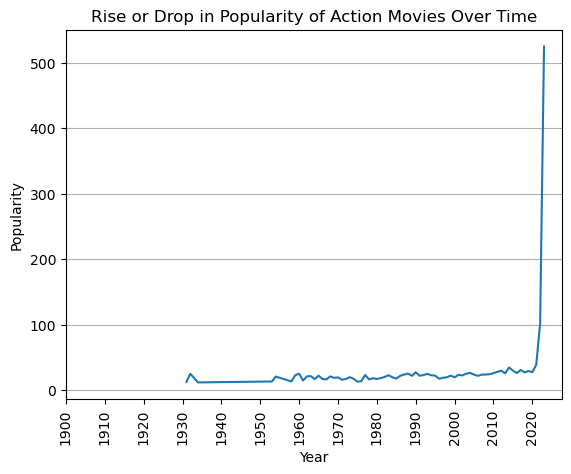

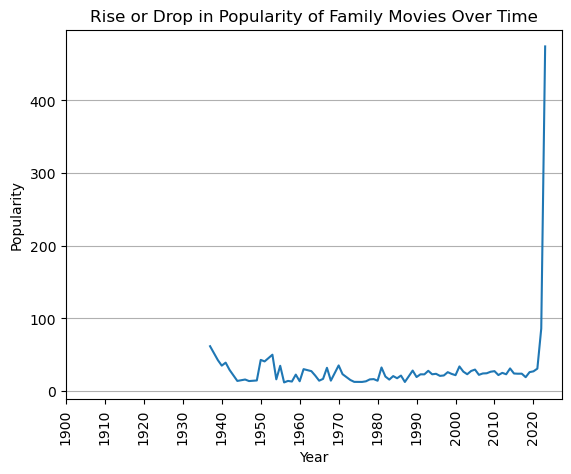

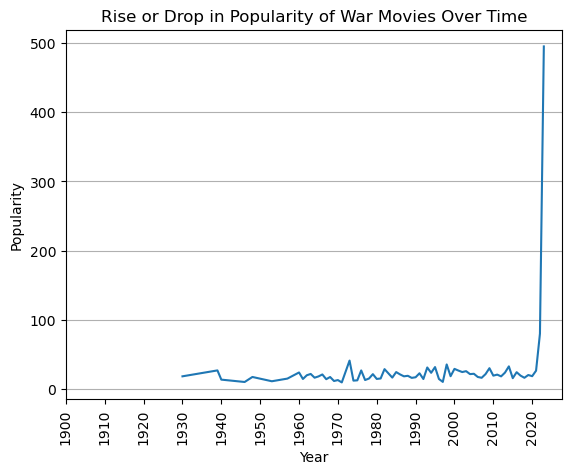

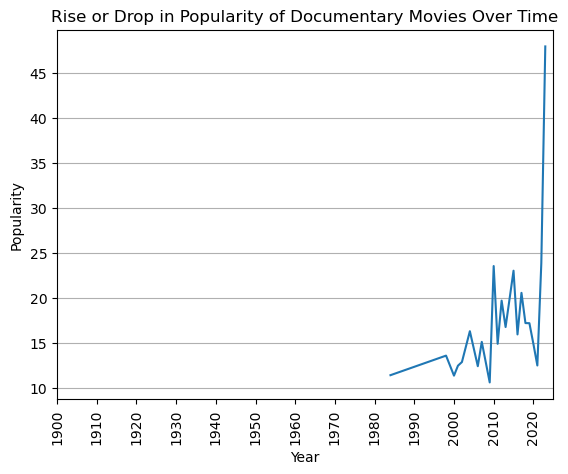

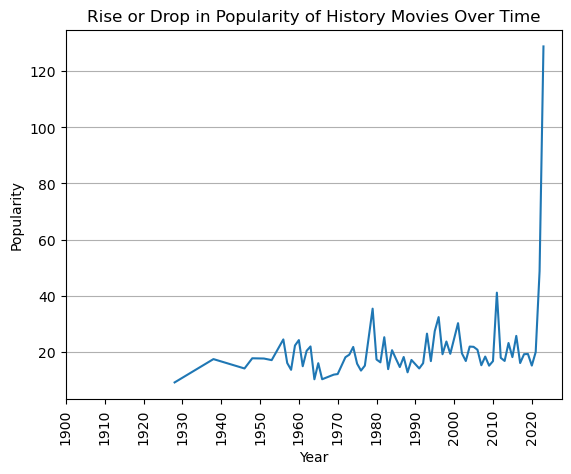

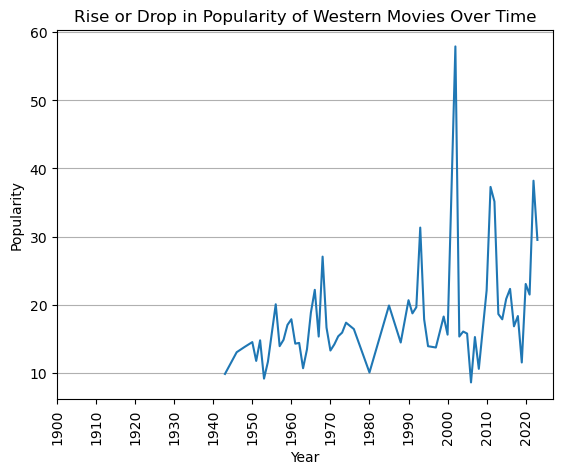

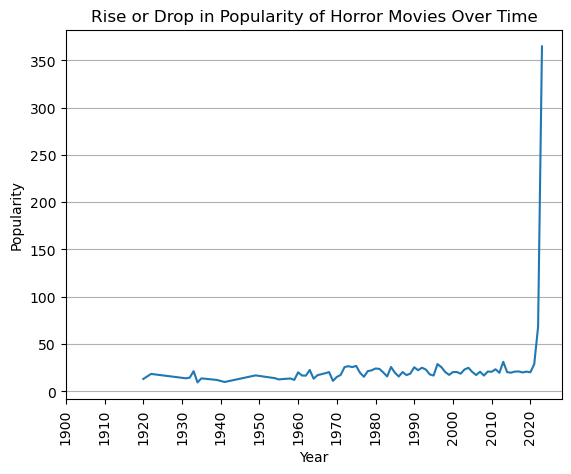

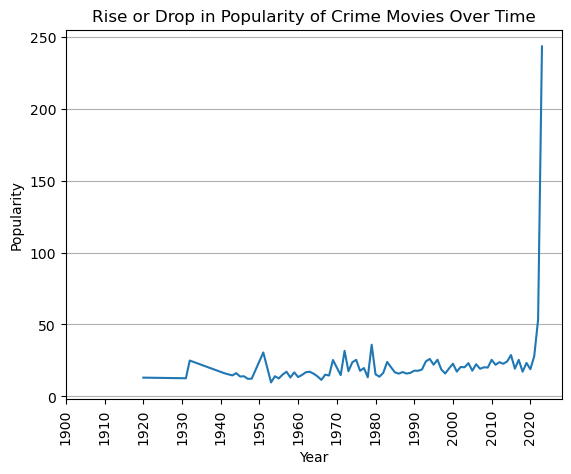

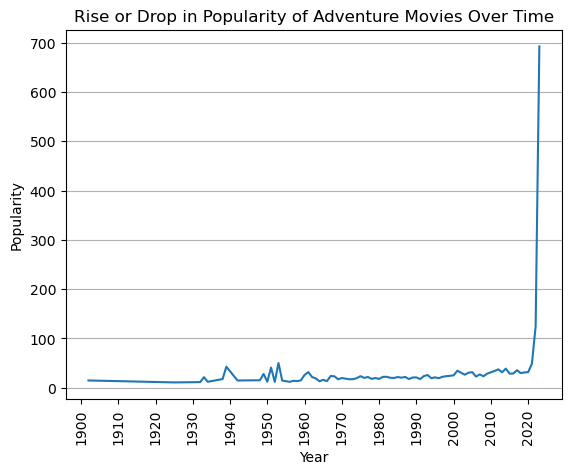

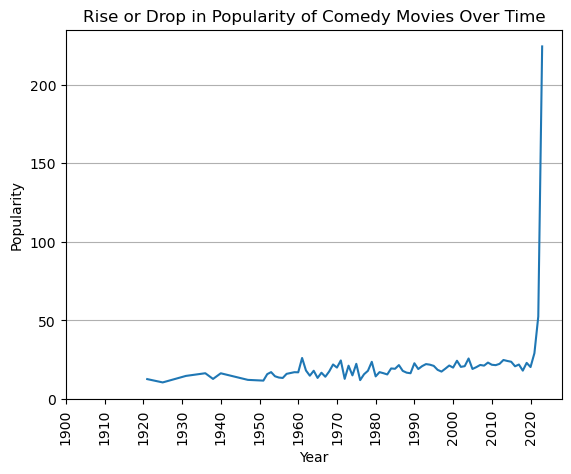

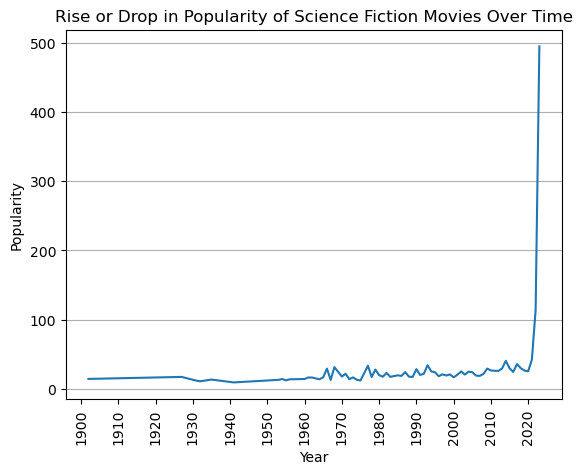

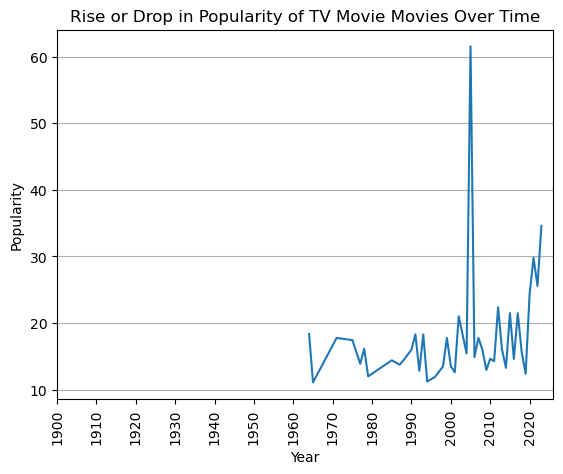

In [64]:
for genre in genres_set:
    plt.plot(df[df['genres'].str.contains(genre)].groupby('year')['popularity'].mean().index,\
             df[df['genres'].str.contains(genre)].groupby('year')['popularity'].mean().values)
    plt.title('Rise or Drop in Popularity of '+str(genre)+' Movies Over Time')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(np.arange(1900, 2030, step=10), rotation=90)
    plt.grid(axis='y')
    plt.show()

## Visualization of Rise and Drop of Popularity with Different Languages Over the Time

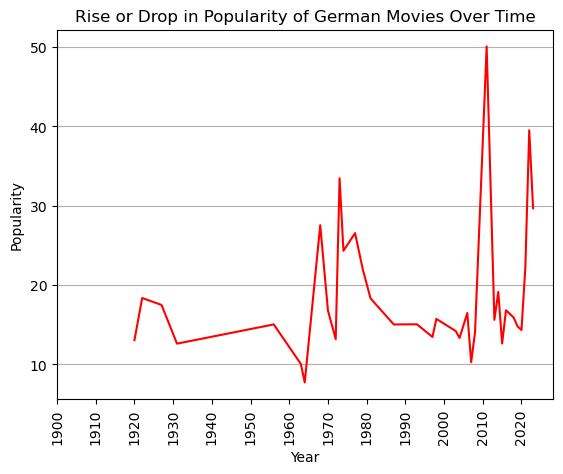

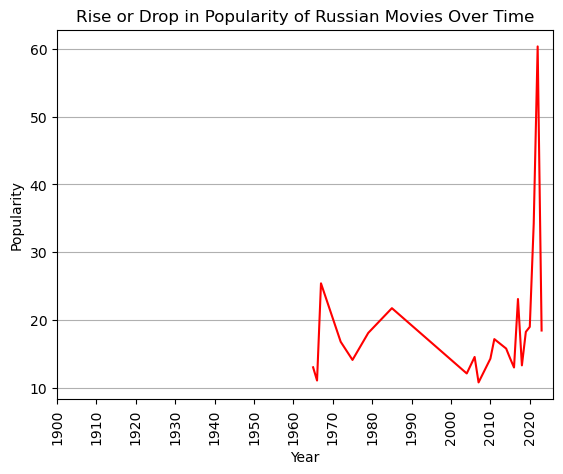

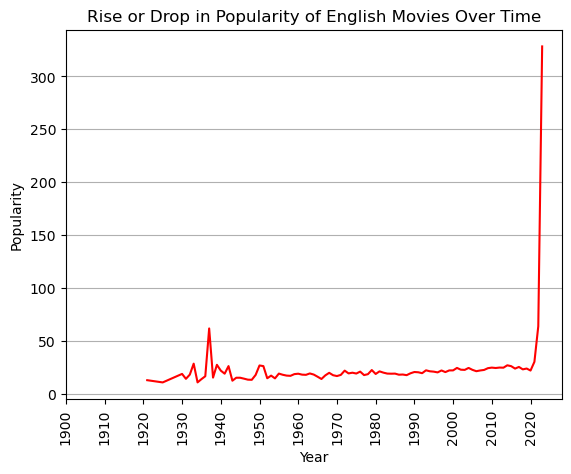

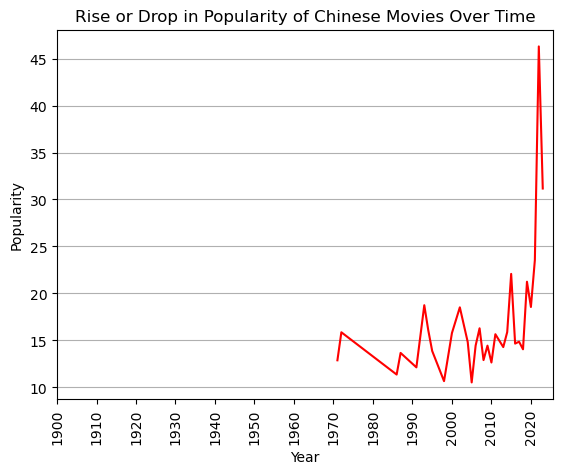

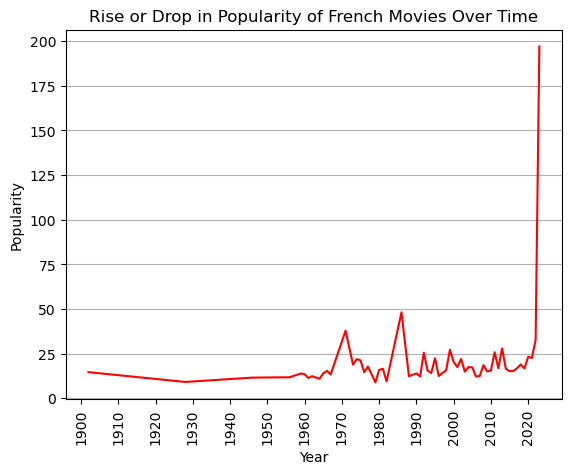

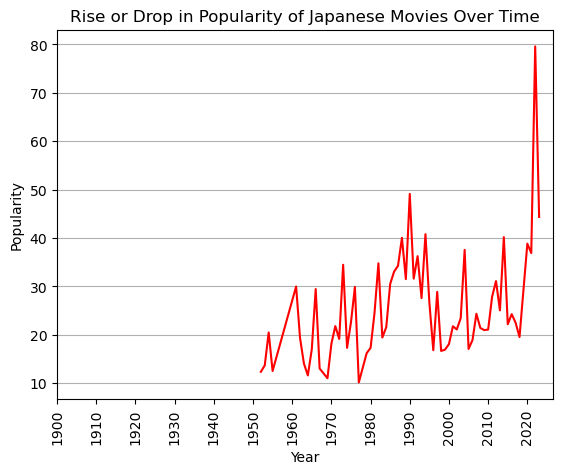

In [65]:
unique_language = {'English', 'Japanese', 'French', 'Chinese', 'German', 'Russian'}

for language in unique_language:
    plt.plot(df[df['original_language'].str.contains(language)].groupby('year')['popularity'].mean().index, \
             df[df['original_language'].str.contains(language)].groupby('year')['popularity'].mean().values, \
             color='red')
    plt.title('Rise or Drop in Popularity of '+str(language)+ ' Movies Over Time')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(np.arange(1900, 2030, step=10), rotation=90)
    plt.grid(axis='y')
    plt.show()